<a href="https://colab.research.google.com/github/sayandas96476/Assignment/blob/main/Gemstones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import copy
from sklearn.metrics import confusion_matrix

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [ ]:
base_dir = %pwd
data_dir = os.path.join(base_dir, 'Data')
model_path = os.path.join(base_dir, 'Model')
BATCH_SIZE = 16
IMG_SIZE = 256
input_shape = (IMG_SIZE,IMG_SIZE)
seed = 123
# For reproducibility
#np.random.seed(seed)
#train_frac = 0.8
elu_alpha = 1.0

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255)
train_path= str("/content/drive/MyDrive/train")
sample_data = image_gen.flow_from_directory(
    directory=train_path,
    target_size=input_shape,
    color_mode='rgb', 
    classes=None,
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    shuffle=True, 
    seed=seed,
    save_to_dir=None, 
    save_prefix='', 
    save_format='png',
    follow_links=False, 
    subset=None, 
    interpolation='nearest'
)

Found 198 images belonging to 6 classes.


In [ ]:
n_classes = sample_data.num_classes
#generate name-label_number pairs 
class_indices = sample_data.class_indices
class_indices

{'Alexandrite': 0,
 'Almandine': 1,
 'Amazonite': 2,
 'Amber': 3,
 'Amethyst': 4,
 'Ametrine': 5}

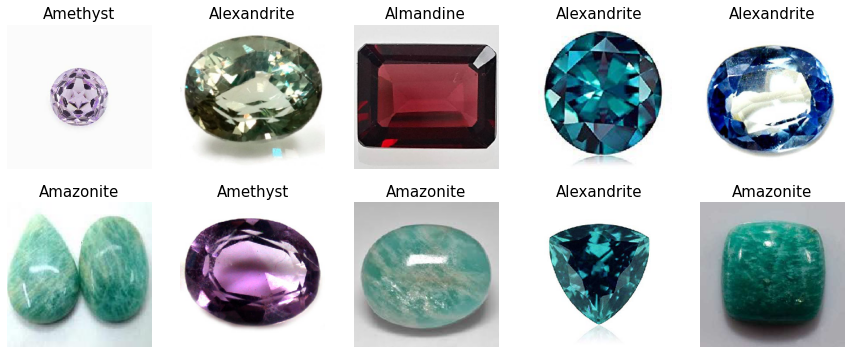

In [ ]:
def plot_image(img):
    plt.imshow(img)
    plt.axis('off')

images, labels = sample_data[0]
sample_size = 10
plt.figure(figsize=(15,6))
for i in range(sample_size):
    class_id = np.argmax(labels[i])
    style_name = [key for key in class_indices if class_indices[key] == class_id][0]
    
    plt.subplot(2,5,i+1)
    plot_image(images[i])
    plt.title(style_name, fontsize=15)

In [ ]:
temp_df = pd.DataFrame({'class': sample_data.classes}).value_counts().reset_index().sort_values(by='class')
#temp_df['class_name'] = 
temp_df.columns = ['class', 'counts']

Number of images:  198


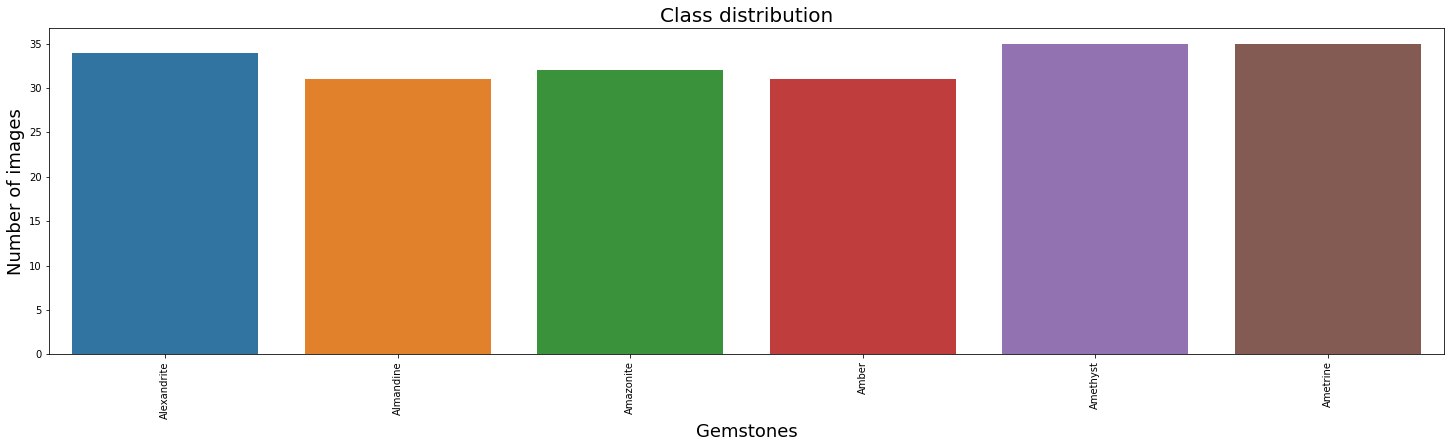

In [ ]:
plt.figure(figsize=(25,6))
sns.barplot(data=temp_df,
            x='class',
            y='counts')
plt.ylabel('Number of images', fontsize=18)
plt.xlabel('Gemstones', fontsize=18)
plt.title('Class distribution', fontsize=20)
plt.xticks(np.arange(len(class_indices)), labels=class_indices.keys(), rotation=90)

print('Number of images: ', np.sum(temp_df['counts'].values))

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
train_path = '/content/drive/MyDrive/train'
valid_path = '/content/drive/MyDrive/test'

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in vgg.layers:
  layer.trainable = False


In [ ]:
folders = glob('/content/drive/MyDrive/train/*')
len(folders)

6

In [ ]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
from keras.metrics import TopKCategoricalAccuracy
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy', TopKCategoricalAccuracy(3, "top-3 accuracy")]
)

In [ ]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 198 images belonging to 6 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 24 images belonging to 6 classes.


In [ ]:
from keras.metrics import TopKCategoricalAccuracy
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/5
7/7 [==============================] - 101s 14s/step - loss: 0.9232 - accuracy: 0.7121 - top-3 accuracy: 0.9141 - val_loss: 1.2830 - val_accuracy: 0.6250 - val_top-3 accuracy: 0.8750
Epoch 2/5
7/7 [==============================] - 100s 14s/step - loss: 0.3614 - accuracy: 0.8737 - top-3 accuracy: 0.9848 - val_loss: 1.0756 - val_accuracy: 0.6250 - val_top-3 accuracy: 0.9167
Epoch 3/5
7/7 [==============================] - 100s 14s/step - loss: 0.2622 - accuracy: 0.8939 - top-3 accuracy: 1.0000 - val_loss: 1.1832 - val_accuracy: 0.5833 - val_top-3 accuracy: 0.8750
Epoch 4/5
7/7 [==============================] - 100s 14s/step - loss: 0.1741 - accuracy: 0.9596 - top-3 accuracy: 0.9949 - val_loss: 0.9616 - val_accuracy: 0.7083 - val_top-3 accuracy: 0.9167
Epoch 5/5
7/7 [==============================] - 101s 14s/step - loss: 0.1543 - accuracy: 0.9646 - top-3 accuracy: 0.9949 - val_loss: 0.7978 - val_accuracy: 0.6667 - val_top-3 accuracy: 0.8750
